In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## PDF - 40 Nodes - PG 100x100 - 20m trans range


In [91]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_12\\data_dd_n_40_p_120_pdf.csv')

In [92]:
df.head()

,run,PauseTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-DD-132-20220218-11:39:5...,120,12,TARPNetwork.node[17].app[0],NaN,NaN,533.0,533000.0,533.0,900.0,900.0,900000.0
1,RandomWaypointMobility-DD-147-20220218-11:45:2...,120,27,TARPNetwork.node[17].app[0],NaN,NaN,449.0,449000.0,449.0,900.0,900.0,900000.0
2,RandomWaypointMobility-DD-129-20220218-11:38:4...,120,9,TARPNetwork.node[22].app[0],643.0,643000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomWaypointMobility-DD-129-20220218-11:38:4...,120,9,TARPNetwork.node[17].app[0],NaN,NaN,546.0,546000.0,546.0,900.0,900.0,900000.0
4,RandomWaypointMobility-DD-148-20220218-11:45:5...,120,28,TARPNetwork.node[17].app[0],NaN,NaN,528.0,528000.0,528.0,900.0,900.0,900000.0


In [93]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [94]:
df = df.sort_values(by=['repetition'])

In [95]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [96]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [97]:
print (results)   

[0.7636, 0.8474, 0.8038, 0.7179, 0.7674, 0.7772, 0.8726, 0.6994, 0.4631, 0.7706, 0.7234, 0.8191, 0.7679, 0.8639, 0.7592, 0.7995, 0.8162, 0.9141, 0.7732, 0.6784, 0.7631, 0.769, 0.7503, 0.6648, 0.6643, 0.7111, 0.7606, 0.6969, 0.7433, 0.6672]


In [98]:
print (results_x) 

[0.6733, 0.8344, 0.8911, 0.7133, 0.6767, 0.7256, 0.8222, 0.6156, 0.4011, 0.7144, 0.6311, 0.7933, 0.7567, 0.8456, 0.6933, 0.8456, 0.7533, 0.9533, 0.7444, 0.6478, 0.7122, 0.7411, 0.7711, 0.5711, 0.5489, 0.7156, 0.7589, 0.6533, 0.61, 0.5289]


In [99]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 75.3


In [100]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 71.14


In [101]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[89.53, 80.6, 76.25, 75.73, 71.14, 71.34, 68.23, 80.36]})

dd_x_errors = [1.49, 1.67, 3.03, 3.97, 0, 0, 0, 1.35]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[64.03, 56.37, 51.55, 53.91, 50.97, 62.06, 56.86, 76.08]})

spd_1_x_errors = [2.91, 3.03, 2.84, 4.1, 3.65, 6.16, 10.5, 12.6]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[72.84, 66.88, 62.46, 61.42, 60.45, 67.94, 60.2, 78.08]})

spd_2_x_errors = [3.23, 2.31, 3.14, 3.75, 4.04, 6.3, 10.4, 12.7]

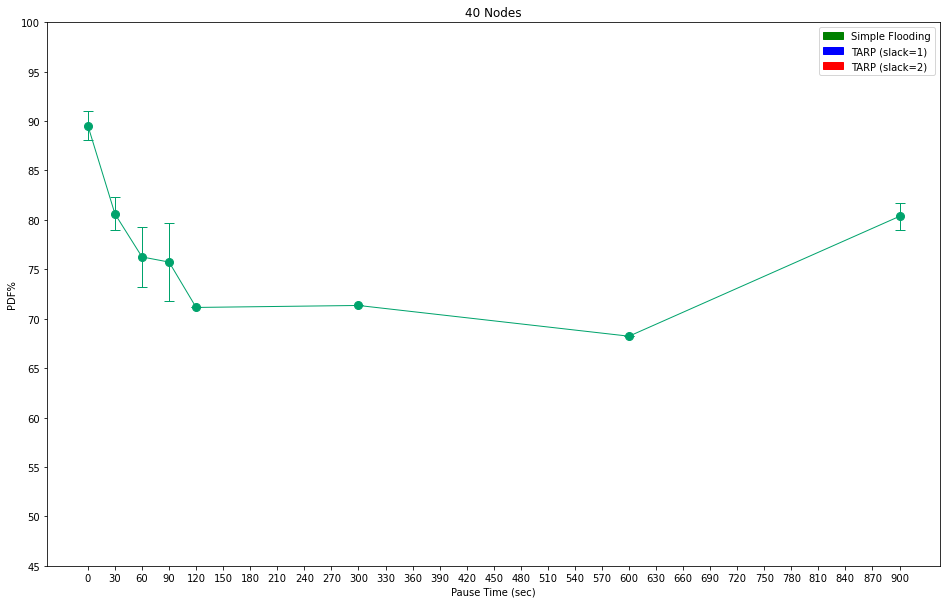

In [102]:
plt.xlabel("Pause Time (sec)")
plt.ylabel("PDF%")
plt.title("40 Nodes")

plt.xticks(np.arange(0,901, 30))
plt.yticks(np.arange(0,101, 5))
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([45, 100])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.PDF, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='#00A36C', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

# plt.errorbar(
#   x=df_spd_1_x.PauseTime, 
#   y=df_spd_1_x.PDF, 
#   yerr=spd_1_x_errors, 
#   capsize=5,
#   marker='o', 
#   color='#4682B4', 
#   markersize=8, 
#   linewidth=1, 
#   linestyle='-')

# plt.errorbar(
#   x=df_spd_2_x.PauseTime, 
#   y=df_spd_2_x.PDF, 
#   yerr=spd_2_x_errors, 
#   capsize=5,
#   marker='o', 
#   color='#EE4B2B', 
#   markersize=8, 
#   linewidth=1.2, 
#   linestyle='-')

red_patch = mpatches.Patch(color='red', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='green', label='Simple Flooding')
blue_patch = mpatches.Patch(color='blue', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-40-100x100-20m.png', dpi=300)